# How Skill depends on exposure density

This notebook explores how the model skill depends on the exposure density threshold ($n_{thresh}$)

First, we load the modlues needed, including some key functions from utility.py

In [2]:
import sys, os
#change path to path of current skript, where also utility.py lies
sys.path.append('C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/code_and_data/')

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib 
import colorcet as cc
from utility import data_dir, read_at_centroid_data, compute_verification_stats, get_scores_from_exposure_threshs



Set up the analysis: Define croptypes (here, entries in list croptypes are merged to one crop type, so ```croptypes=['wheat','maize','barley','rapeseed']``` is used for the aggregate 'field crops'), directory of data and output figures, the hail hazard variable. Then load the at_centroid_data (i.e. the information on exposure, damage, and hail hazard at each centroid for each event.)

In [3]:
#%% SETUP
croptypes=['wheat','maize','barley','rapeseed'] 
datadir = f"{data_dir}/data_at_centroid/"
figdir = 'C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/fig/'
var='MESHS'
at_centroid_data={}
# load data for MESHS 
data, croptype = read_at_centroid_data(datadir,croptypes,variable=var)
at_centroid_data[var]=data

First, get skill scores as functions of exposure density threshold for a spatial resolution of 8km and a MESHS threshold of 20 mm. We find that it is mainly the FAR that changes while POD remains almost constant. 

,POD,FAR,HSS,CSI
0,0.808065,0.614022,0.437381,0.353564
10,0.807190,0.555755,0.485802,0.401626
20,0.807629,0.525803,0.509345,0.426072
30,0.804714,0.507724,0.523225,0.439742
40,0.802721,0.503158,0.525300,0.442777
50,0.802405,0.498927,0.527769,0.446036
60,0.800000,0.493949,0.529915,0.449219
70,0.800705,0.489314,0.533566,0.453094
80,0.800000,0.482245,0.538024,0.458418
90,0.800000,0.476023,0.542100,0.463289


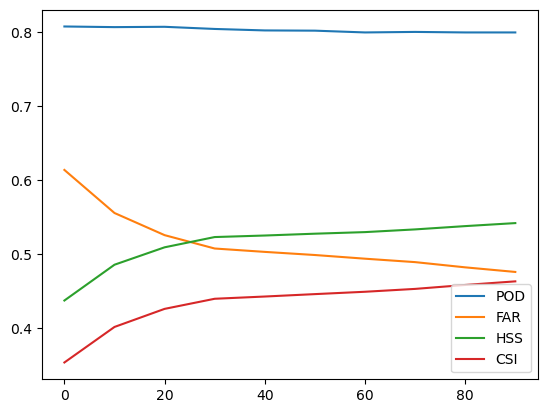

In [7]:
res='8km'
s=20 #hazard threshold
exposure_threshs=np.arange(0,100,10)
scores=['POD','FAR','HSS','CSI']


df=get_scores_from_exposure_threshs(at_centroid_data[var][res],var,s,exposure_threshs,scores)
fig,ax=plt.subplots()
df.plot(ax=ax)
#ax.set_xticks(np.arange(1,20,1))
#ax.set_ylim(0.2,0.7)

df

We see that it is mainly the FAR that depends on the exposure density threshold (it reduces with increasing threshold). Lets explore this more sytematically for all crops. First, load the at_centroid_data for all crops

In [42]:
#%% LOAD DATA
exposure_threshs=np.arange(1,100,1)  #used for plotting
#exposure_threshs=np.concatenate(([1],np.arange(0,101,10)))  #used for printing data
scores=['FAR']
croptypes_lists=[['Weizen','Mais','Gerste','Raps'],['Weizen'],['Mais'],['Raps'],['Gerste'],['Reben']]#,['Weizen'],['Mais'],['Gerste'],['Raps'],['Aepfel'],['Reben']]
en_names={'Weizen_Mais_Gerste_Raps': 'field crops','Weizen': 'wheat', 'Mais': 'maize','Raps': 'rapeseed','Gerste':'barley','Reben': 'grapevine'}
data={}
at_centroid_data_crops={}
df_FAR=pd.DataFrame(index=exposure_threshs)
for croptypes in croptypes_lists:
    at_centroid_data, croptype = read_at_centroid_data(datadir,croptypes,variable=var)
    at_centroid_data_crops[croptype] = at_centroid_data




Again use a MESHS threshold of 20 mm get the FAR as function of exposure threshold. Use 8km resolution for field crops and 1km for grapevine. Print the data to check whether the right thing has happened

In [43]:
s=20 #hazard threshold
scores=['POD','FAR','HSS','CSI']
for croptype in at_centroid_data_crops.keys():
    if croptype=='Reben':
        res='1km'
        exp_threshs=np.arange(1,41,1) #used for plotting
        #exp_threshs=np.concatenate(([1],np.arange(0,40,5))) #used for printing data 
    else:
        res='8km'
        exp_threshs=exposure_threshs
        
    df=get_scores_from_exposure_threshs(at_centroid_data_crops[croptype][res],var,s,exp_threshs,scores=scores)
    data[croptype]=df
    if croptype in en_names.keys():
        name=en_names[croptype]
    else:
        name=croptype
    df_FAR[f'{croptype} ({res})']=df['FAR']

df_FAR_grapevine=df_FAR['grapevine (1km)']
df_FAR_field=df_FAR['field crops (8km)']
df_FAR=df_FAR.drop('grapevine (1km)',axis=1)
df_FAR=df_FAR.drop('field crops (8km)',axis=1)

data

{'Weizen_Mais_Gerste_Raps':          POD       FAR       HSS       CSI
 1   0.820244  0.621273  0.434063  0.349702
 2   0.820244  0.609635  0.443361  0.359602
 3   0.820244  0.596913  0.454339  0.370370
 4   0.821366  0.584588  0.465996  0.380991
 5   0.821053  0.578378  0.471056  0.386139
 ..       ...       ...       ...       ...
 95  0.807540  0.465879  0.547178  0.473807
 96  0.807540  0.465177  0.547844  0.474359
 97  0.807540  0.465177  0.547844  0.474359
 98  0.806773  0.463576  0.548996  0.475352
 99  0.804829  0.462366  0.549895  0.475624
 
 [99 rows x 4 columns],
 'Weizen':          POD       FAR       HSS       CSI
 1   0.865385  0.668072  0.393849  0.315631
 2   0.864641  0.655666  0.405001  0.326722
 3   0.866667  0.645051  0.414015  0.336570
 4   0.865922  0.630513  0.428302  0.349493
 5   0.865922  0.629630  0.428400  0.350282
 ..       ...       ...       ...       ...
 95  0.855019  0.501085  0.537072  0.460000
 96  0.854478  0.496703  0.539286  0.463563
 97  0.854478

Now plot this information as Figure (Figure 6 of the Paper)

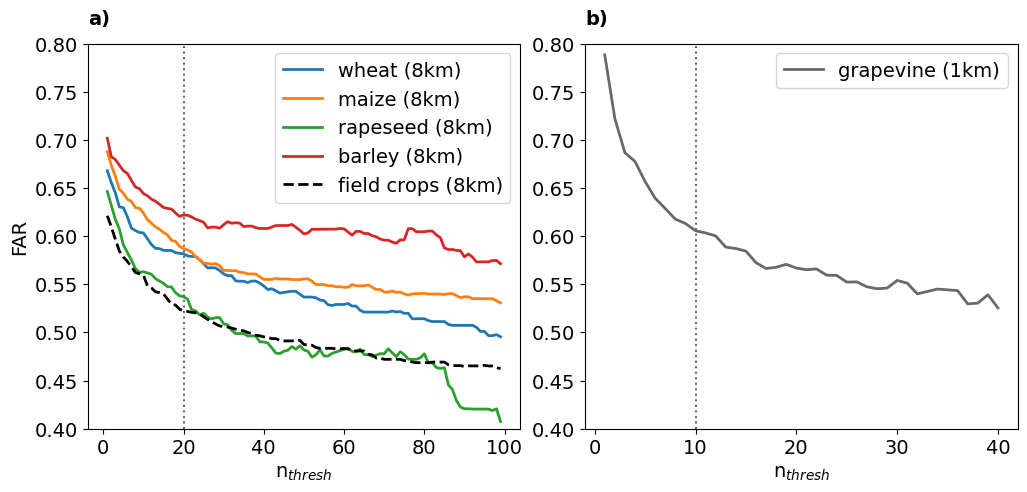

In [44]:
labels=['a)','b)']
#fontsizes
font_s=14
font_l=20
matplotlib.rcParams.update({'font.size': font_s, 'axes.labelsize':font_s})

fig,axs=plt.subplots(1,2,figsize=(12,5))
plt.subplots_adjust(wspace=0.15)
df_FAR.plot(ax=axs[0],linewidth=2)
df_FAR_field.plot(ax=axs[0],linewidth=2,color='k',linestyle='dashed')
df_FAR_grapevine.plot(ax=axs[1],color='dimgrey',linewidth=2)
axs[1].legend()
axs[0].legend()
axs[0].set_ylabel('FAR')
#plot horizontal thresholds
axs[0].axvline(x=20,color='dimgrey',linestyle='dotted')
axs[1].axvline(x=10,color='dimgrey',linestyle='dotted')
for i,ax in enumerate(axs):
    ax.text(0,1.05,labels[i],
                    transform=ax.transAxes,fontweight='bold')
    ax.set_xlabel(r'n$_{thresh}$')
    ax.set_ylim(0.4,0.8)
    ax.set_yticks(np.arange(0.4,0.85,0.05))

Now, save the figure to png and pdf.

In [45]:
fig.savefig(f'{figdir}/Figure_exposure_density.png',dpi=200,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_exposure_density.pdf',dpi=200,bbox_inches='tight')